In [1]:
import requests
import pandas as pd
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from datetime import datetime, timedelta

class Twits():
    
    def __init__(self):
        self.token = "fda2d6a42e36b9337c7bfc0d5263a05ca04040f2"
        self.url = "https://api.stocktwits.com/api/2/"
        self.headers = {'Content-Type': 'application/json'}
        
    def printUrl(self):
        print(self.url)
        
    def get_user_msgs(self, user_id, since=0, max=0, limit=0, callback=None, filter=None):

        """Returns the most recent 30 messages for the specified user.
        Args:
            user_id (int) = User ID or Username of the stream's user
                            you want to show (Required)
            since (int) = Returns results with an ID greater than (
                          more recent than) the specified ID.
            max (int) = Returns results with an ID less than
                        (older than) or equal to the specified ID.
            limit (int) = Default and max limit is 30.
                          This limit must be a number under 30.
            callback = Define your own callback function name,
                       add this parameter as the value.
            filter (string) = Filter messages by links, charts, or videos.
                              (Optional)
        Return:
            raw_json (dict) = The JSON output unparsed
        """

        url = self.url + 'streams/user/' + user_id + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit),
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                 'filter': '{}'.format(filter)
                }

        r = requests.get(url, headers=self.headers, params=data)
        if r.status_code != 200:
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        return raw_json, r.headers

    def get_symbol_msgs(self, symbol_id, since=0, max=0, limit=0, callback=None, filter=None):

        '''Returns the most recent 30 messages for the specified symbol.
        Args:
            symbol_id:	Ticker symbol, Stock ID, or
                        RIC code of the symbol (Required)
            since:	Returns results with an ID greater than (more recent than)
                    the specified ID.
            max:	Returns results with an ID less than (older than) or
                    equal to the specified ID.
            limit:	Default and max limit is 30. This limit must be a
                    number under 30.
            callback:	Define your own callback function name,
                        add this parameter as the value.
            filter:	Filter messages by links, charts, videos,
                    or top. (Optional)
        Return:
            raw_json (dict) = The JSON output unparsed
        '''

        url = self.url + 'streams/symbol/' + symbol_id + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit),
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                 'filter': '{}'.format(filter)
                }

        r = requests.get(url, headers=self.headers, params=data)
        if r.status_code != 200:
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        return raw_json, r.headers

    def get_specified_conversation_msgs(self, conversation_id, since=0, max=0, limit=0, callback=None):

        '''
        Args:
            conversation_id:	The message ID of the parent message
                                to a conversation. (Required)
            since:	Returns results with an ID greater than (more recent than)
                    the specified ID.
            max:	Returns results with an ID less than (older than) or equal
                    to the specified ID.
            limit:	Default and max limit is 30. This limit must be a
                    number under 30.
            callback:	Define your own callback function name, add this
                        parameter as the value.
        Return:
            raw_json (dict) = The JSON output unparsed
        '''

        url = self.url + 'streams/conversation/' + conversation_id + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit)
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                }

        r = requests.get(url, headers=self.headers, params=data)
        if r.status_code != 200:
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        return raw_json, r.headers
    
    
    def get_trending_msgs(self, since=0, max=0, limit=0, callback=None):

        '''
        Returns the most recent 30 messages with trending symbols in the last 5 minutes.
        
        Args:
            since:	Returns results with an ID greater than (more recent than)
                    the specified ID.
            max:	Returns results with an ID less than (older than) or equal
                    to the specified ID.
            limit:	Default and max limit is 30. This limit must be a
                    number under 30.
            callback:	Define your own callback function name, add this
                        parameter as the value.
        Return:
            raw_json (dict) = The JSON output unparsed
        '''

        url = self.url + 'streams/trending'  + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit)
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                }

        r = requests.get(url, headers=self.headers, params=data)
        if r.status_code != 200:
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        return raw_json, r.headers
    
    def get_suggested_msgs(self, since=0, max=0, limit=0, callback=None):

        '''
        Returns the most recent 30 messages from our suggested users,
        a curated list of quality Stocktwits contributors.
        
        Args:
            since:	Returns results with an ID greater than (more recent than)
                    the specified ID.
            max:	Returns results with an ID less than (older than) or equal
                    to the specified ID.
            limit:	Default and max limit is 30. This limit must be a
                    number under 30.
            callback:	Define your own callback function name, add this
                        parameter as the value.
        Return:
            raw_json (dict) = The JSON output unparsed
        '''

        url = self.url + 'streams/suggested' + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit)
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                }

        r = requests.get(url, headers=self.headers, params=data)
        if r.status_code != 200:
            if r.status_code == 429:
                raise Exception('Rate limit exceeded. Client may not make more than 400 requests an hour {}'
                                .format(r.status_code))
                                
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        return raw_json, r.headers
    
    def get_symbol_data(self, symbol_id, since=0, max=0, limit=0, callback=None, filter=None):

        '''Returns the id, ticker, aliases, if following, watchlist count for given ticker.
        Args:
            symbol_id:	Ticker symbol, Stock ID, or
                        RIC code of the symbol (Required)
            since:	Returns results with an ID greater than (more recent than)
                    the specified ID.
            max:	Returns results with an ID less than (older than) or
                    equal to the specified ID.
            limit:	Default and max limit is 30. This limit must be a
                    number under 30.
            callback:	Define your own callback function name,
                        add this parameter as the value.
            filter:	Filter messages by links, charts, videos,
                    or top. (Optional)
        Return:
            raw_json (dict) = The JSON output unparsed
        '''

        url = self.url + 'streams/symbol/' + symbol_id + '.json?access_token=' + self.token

        data = {
                 'since': '{}'.format(since),
                 'max': '{}'.format(max),
                 'limit': '{}'.format(limit),
                 # Fix when you figure out what this is
                 # 'callback' : '{}'.format(None),
                 'filter': '{}'.format(filter)
                }

        r = requests.get(url, headers={'x-ratelimit-limit' : 'True'}, params=data)
        if r.status_code != 200:
            if r.status_code == 429:
                raise Exception('Rate limit exceeded. Client may not make more than 400 requests an hour {}'
                                .format(r.status_code))
                
            raise Exception('Unable to Return Request {}'
                            .format(r.status_code))

        raw_json = r.json()
        
        return raw_json['symbol'], r.headers
    
    def scrape_ticker(self, symbol_id, lookback_volume):

        '''Returns a list of historical messages for the symbol, including msg text, user and symbol info.
        Args:
            ticker:	Ticker symbol, Stock ID, or
                        RIC code of the symbol (Required)
            lookback_volume: The amount of messages to retrieve

        Return:
            list of messages, user and symbol data
            contains:
                - ticker
                - company name
                - watchlist count
                - user info
                - sentiment
                - text
                - date and time
        '''
        counter = 0
        failures = 0
        msg_limit = 30

        master_contents = []

        try:
            msgs = self.get_symbol_msgs(symbol_id=symbol_id, limit=msg_limit)
            first_id = msgs[0]['messages'][0]['id']-1
            print('Querying Initialized')
        except Exception:
            print('Error:\tAPI Query Failed to Yield Messages on Initial Query\t', Exception)
            return -1

        for _ in range(int(msg_limit * lookback_volume / msg_limit)):

            try:
                time.sleep(1)
                msgs = self.get_symbol_msgs(symbol_id=symbol_id, max=int(first_id), limit=msg_limit)
                first_id = msgs[0]['messages'][-1]['id']-1
            except Exception:
                print('Error:\tAPI Query Failed to Yield Messages on Secondary Query\t', Exception)
                print('Sleeping 30 sec')
                time.sleep(30)
                print('Retrying')
                msgs = self.get_symbol_msgs(symbol_id=symbol_id, max=int(first_id), limit=msg_limit)
                first_id = msgs[0]['messages'][-1]['id']-1
                failures += 1
                

            for item in msgs[0]['messages']:
                ticker_dict = {}
                ticker_dict['msg_id'] = item['id']

                msg_sym_index = [symbol['symbol'] for symbol in item['symbols']].index(symbol_id)
                ticker_dict['symbol'] = item['symbols'][msg_sym_index]

                ticker_dict['ticker_title'] = item['symbols'][0]['title']
                ticker_dict['body'] = item['body']
                ticker_dict['created_date'] = item['created_at'].split('T')[0]
                ticker_dict['created_time'] = item['created_at'].split('T')[1]
                ticker_dict['user'] = item['user']

                try:
                    ticker_dict['sentiment'] = item['entities']['sentiment']['basic']
                except TypeError:
                    ticker_dict['sentiment'] = "N/A"

                master_contents.append(ticker_dict)
            
            counter+=msg_limit
            if counter % 1000 == 0:
                    print('Fetched:\t', counter,'\tFailures:\t', failures)

            if counter >= lookback_volume:
                break

        return master_contents
    
# imporving the scraper function
# 1. remove the len(master contents) replace with an incrementer -- done
# 2. insert a start date limiter
# 3. insert a max id limiter, both can be none
# 4. insert a timer feature with T/F
# 5. figure out why the counter doesn't work past 10k
# 6. really need a better logging system / progress tracking

In [5]:
twit = Twits()
ticker = 'GEO'

res = twit.scrape_ticker(ticker, lookback_volume=27000)


Querying Initialized
Fetched:	 3000 	Failures:	 0
Fetched:	 6000 	Failures:	 0
Fetched:	 9000 	Failures:	 0
Fetched:	 12000 	Failures:	 0
Fetched:	 15000 	Failures:	 0
Fetched:	 18000 	Failures:	 0
Fetched:	 21000 	Failures:	 0
Fetched:	 24000 	Failures:	 0
Fetched:	 27000 	Failures:	 0


In [6]:
res[-1]

{'msg_id': 14388018,
 'symbol': {'id': 5489,
  'symbol': 'GEO',
  'symbol_mic': 'GEO.XNYS',
  'title': 'Geo Group, Inc.',
  'aliases': [],
  'is_following': False,
  'watchlist_count': 10376,
  'has_pricing': True},
 'ticker_title': 'Geo Group, Inc.',
 'body': 'As mentioned over weekend, sold $GEO $JOE, proceeds to cash currently.',
 'created_date': '2013-07-01',
 'created_time': '15:44:18Z',
 'user': {'id': 209828,
  'username': 'MPortfolios',
  'name': 'Funding Secured',
  'avatar_url': 'https://avatars.stocktwits.com/production/209828/thumb-1392341647.png',
  'avatar_url_ssl': 'https://avatars.stocktwits.com/production/209828/thumb-1392341647.png',
  'join_date': '2013-01-25',
  'official': True,
  'identity': 'Official',
  'classification': ['suggested', 'official'],
  'search_regions': [],
  'followers': 8098,
  'following': 65,
  'ideas': 4181,
  'watchlist_stocks_count': 23,
  'like_count': 415,
  'plus_tier': '',
  'premium_room': '',
  'trade_app': False,
  'trade_status': 'PE

In [7]:
def get_dates(scraped_posts):
    return [msg['created_date'] for msg in scraped_posts]

def get_times(scraped_posts):
    return [msg['created_time'] for msg in scraped_posts]

def get_watchers(scraped_posts):
    return [msg['symbol']['watchlist_count'] for msg in scraped_posts]
    
def get_sentiment(scraped_posts):
        return [msg['sentiment'] for msg in scraped_posts]
    
def get_text(scraped_posts):
        return [msg['body'] for msg in scraped_posts]    
    
def get_datetimes(scraped_posts):
    dates=get_dates(scraped_posts)
    times=get_times(scraped_posts)
    
    datetimes = zip(dates, times)
    datetimes = pd.DataFrame(datetimes)
    datetimes = datetimes.loc[:,0] + " " + datetimes.loc[:,1]
    datetimes = pd.to_datetime(datetimes).dt.tz_convert('US/Eastern')
    
    return datetimes

In [8]:
len(get_sentiment(res))

26039

In [9]:
df = {'dates':get_dates(res),
      'times':get_times(res),
      'datetime':get_datetimes(res),
      'watchers':get_watchers(res),
      'sentiment':get_sentiment(res),
      'text':get_text(res)}
df = pd.DataFrame(data=df)
bins = np.arange(25)
df['time_bin'] = pd.cut(df.datetime.dt.hour, bins, right=False)

In [ ]:
df.to_csv('.csv')

In [ ]:
df

In [ ]:
df.groupby(['dates', 'sentiment']).count().head(1)

In [38]:
sentiment = pd.pivot_table(df, values = 'watchers', index=['dates'], columns = 'sentiment', aggfunc='count').reset_index()
sentiment.set_index('dates', inplace = True)
sentiment.columns = ['bear', 'bull', 'neutral']
sentiment

,bear,bull,neutral
dates,,,
2013-07-01,NaN,NaN,1.0
2013-07-16,NaN,NaN,1.0
2013-07-26,NaN,NaN,1.0
2013-07-31,NaN,NaN,1.0
2013-08-07,NaN,NaN,2.0
...,...,...,...
2022-12-23,NaN,3.0,8.0
2022-12-24,NaN,4.0,2.0
2022-12-25,NaN,1.0,1.0


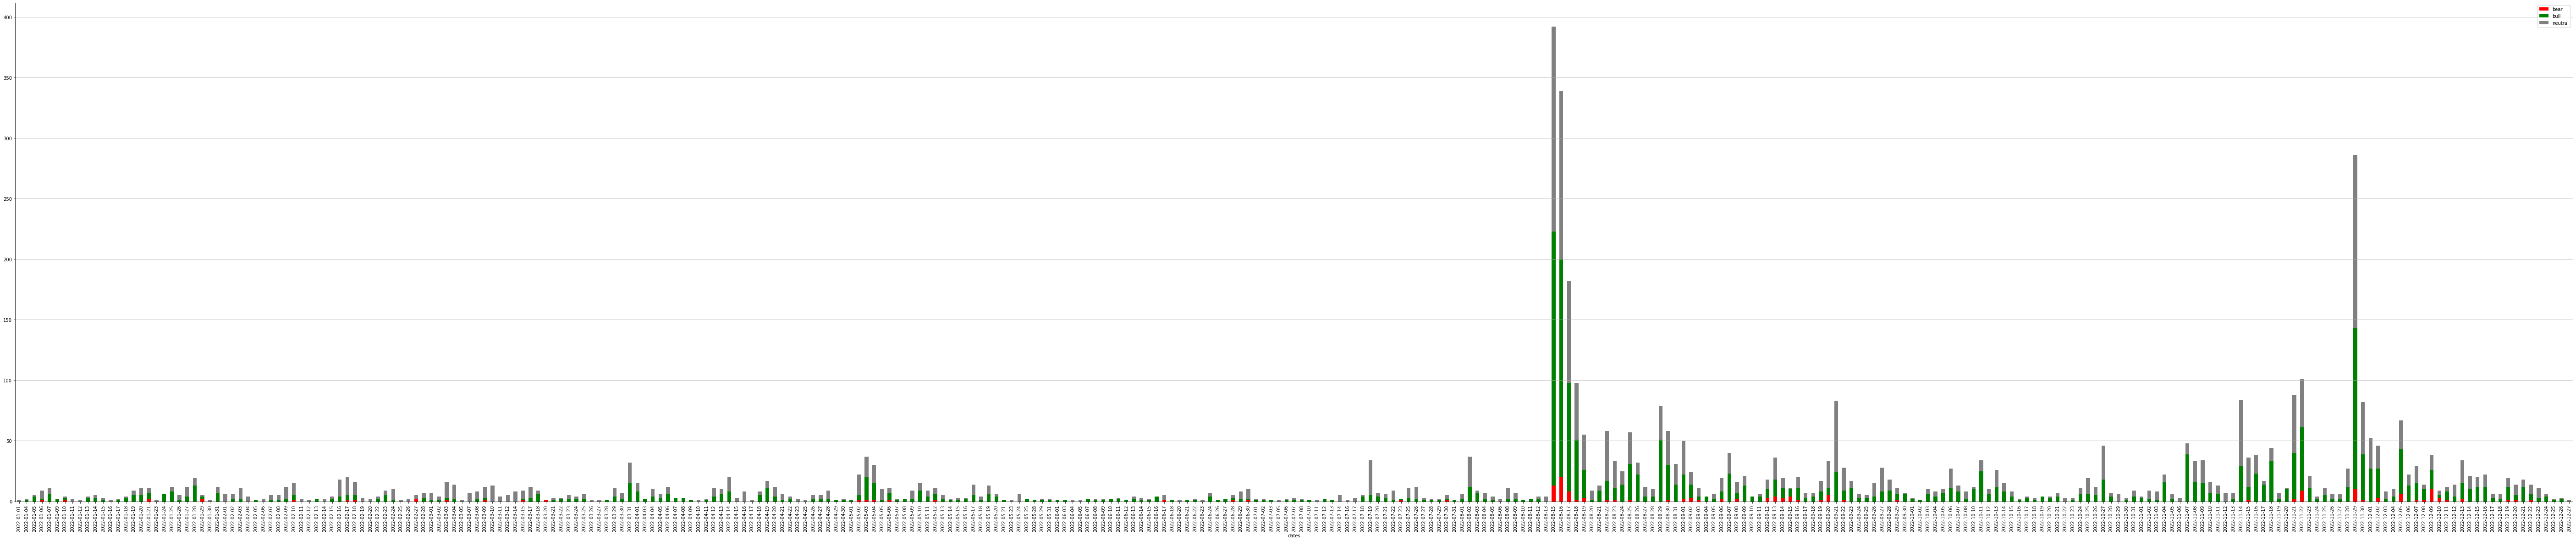

In [23]:
plt.rcParams["figure.figsize"] = (100,20)
sentiment.columns = pd.CategoricalIndex(sentiment.columns.values, 
                                 ordered=True, 
                                 categories=['bear', 'neutral', 'bull'])
sentiment['2022':].plot.bar(stacked = True,
                   color={"bear": "red", "neutral":"grey", "bull": "green"}).grid(axis='y')


In [24]:
bullbear = sentiment['2022':].bull / (sentiment['2022':].bear + sentiment['2022':].bull) * 100 - 50

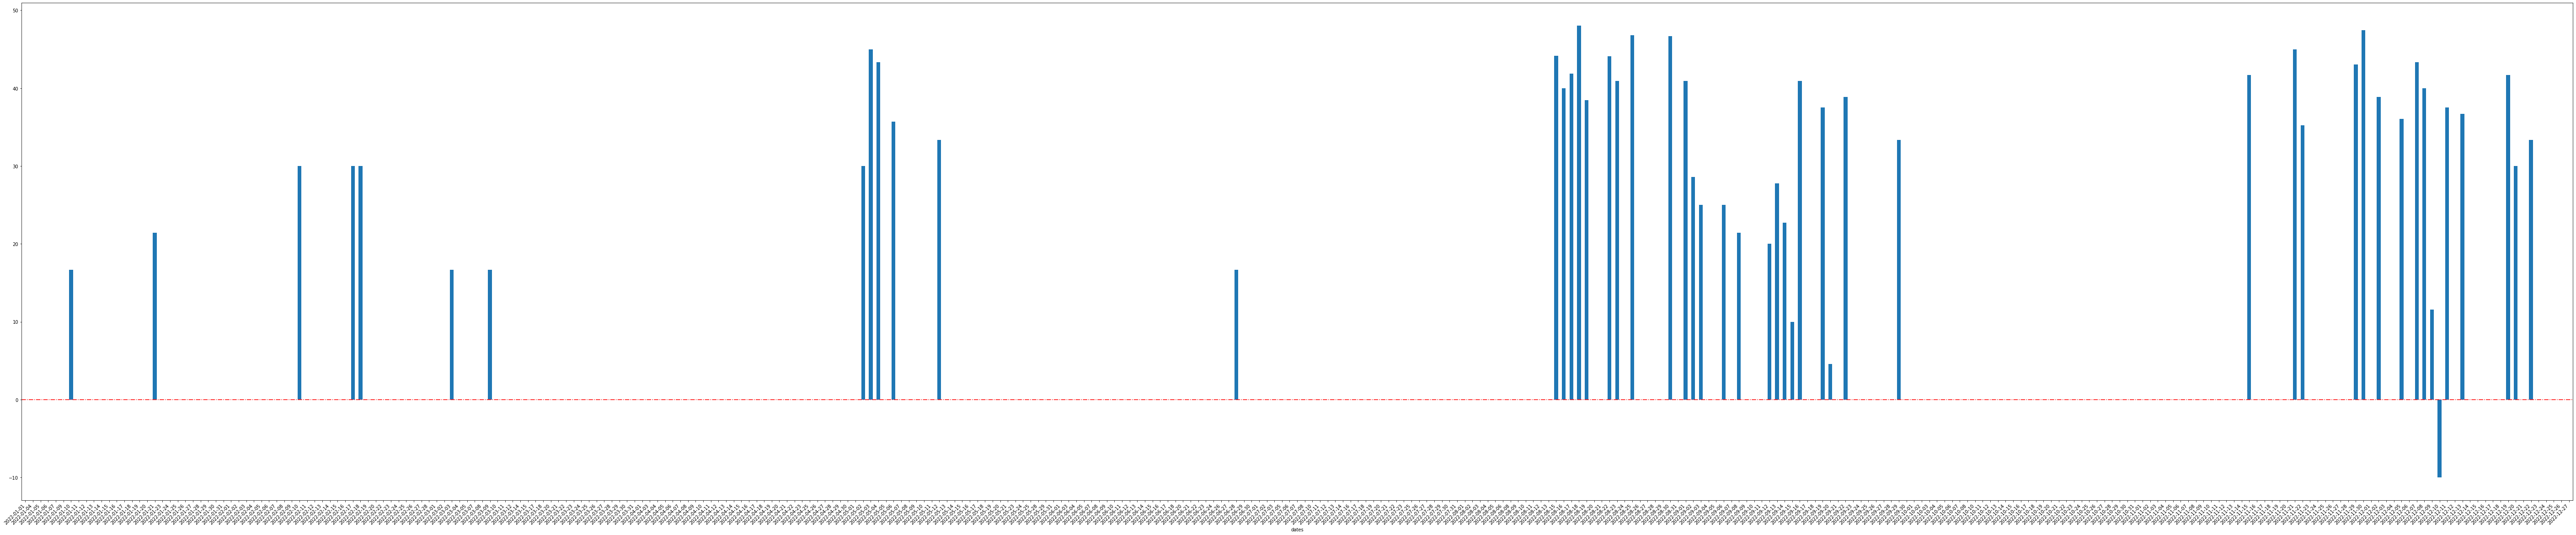

In [25]:

bullbear.plot.bar()
bullbear.rolling(5).mean().plot()
plt.axhline(y = 0, color = 'r', linestyle = '-.')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
bullbear.head(30)

dates
2013-07-01   NaN
2013-07-16   NaN
2013-07-26   NaN
2013-07-31   NaN
2013-08-07   NaN
2013-08-13   NaN
2013-08-16   NaN
2013-08-21   NaN
2013-08-22   NaN
2013-08-23   NaN
2013-08-26   NaN
2013-08-27   NaN
2013-08-29   NaN
2013-08-30   NaN
2013-09-04   NaN
2013-09-05   NaN
2013-09-09   NaN
2013-09-10   NaN
2013-09-12   NaN
2013-09-13   NaN
2013-09-19   NaN
2013-09-23   NaN
2013-09-25   NaN
2013-10-01   NaN
2013-10-03   NaN
2013-10-09   NaN
2013-10-10   NaN
2013-10-16   NaN
2013-10-17   NaN
2013-10-21   NaN
dtype: float64

In [15]:
sentiment

,bear,bull,neutral
dates,,,
2013-07-01,NaN,NaN,1.0
2013-07-16,NaN,NaN,1.0
2013-07-26,NaN,NaN,1.0
2013-07-31,NaN,NaN,1.0
2013-08-07,NaN,NaN,2.0
...,...,...,...
2022-12-23,NaN,3.0,8.0
2022-12-24,NaN,4.0,2.0
2022-12-25,NaN,1.0,1.0


In [26]:
sentiment = pd.pivot_table(df, values = 'watchers', index=['time_bin'], columns = 'sentiment', aggfunc='count').reset_index()
sentiment.set_index('time_bin', inplace = True)
#sentiment.columns = ['bear', 'bull', 'neutral']
sentiment

sentiment,Bearish,Bullish,N/A
time_bin,,,
"[0, 1)",22,127,172
"[1, 2)",13,92,202
"[2, 3)",6,72,138
"[3, 4)",4,65,107
"[4, 5)",7,106,96
"[5, 6)",4,112,111
"[6, 7)",12,161,442
"[7, 8)",20,297,523
"[8, 9)",43,518,738


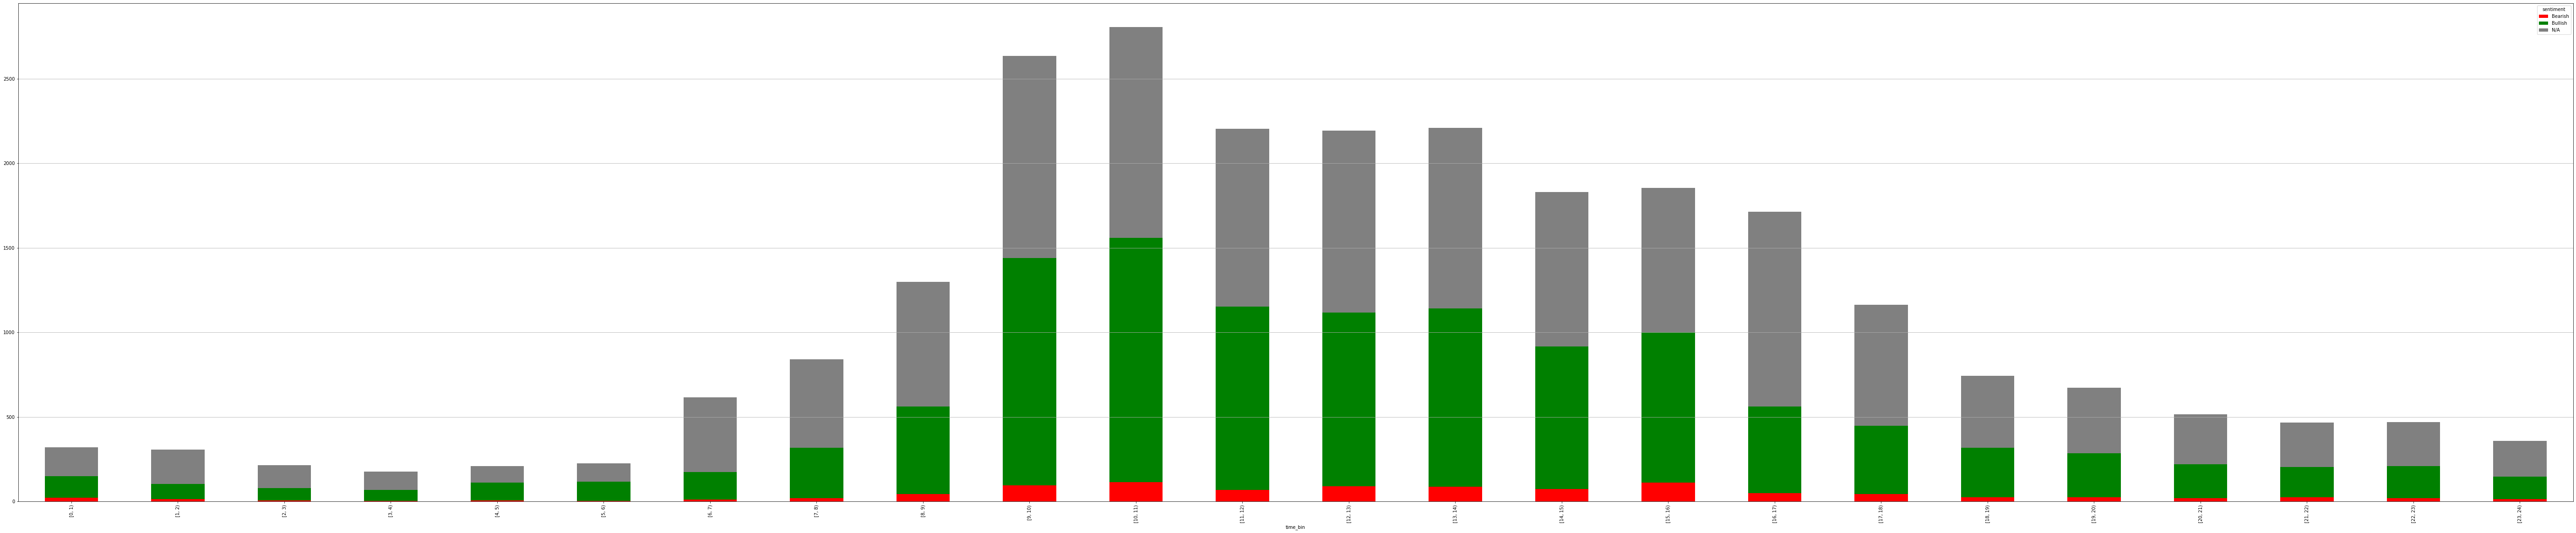

In [27]:
sentiment.plot.bar(stacked = True,
                   color={"Bearish": "red", "N/A":"grey", "Bullish": "green"}).grid(axis='y')

In [28]:
df['dates'] = pd.to_datetime(df.dates)
df.set_index('dates', inplace = True)


<AxesSubplot:xlabel='dates'>

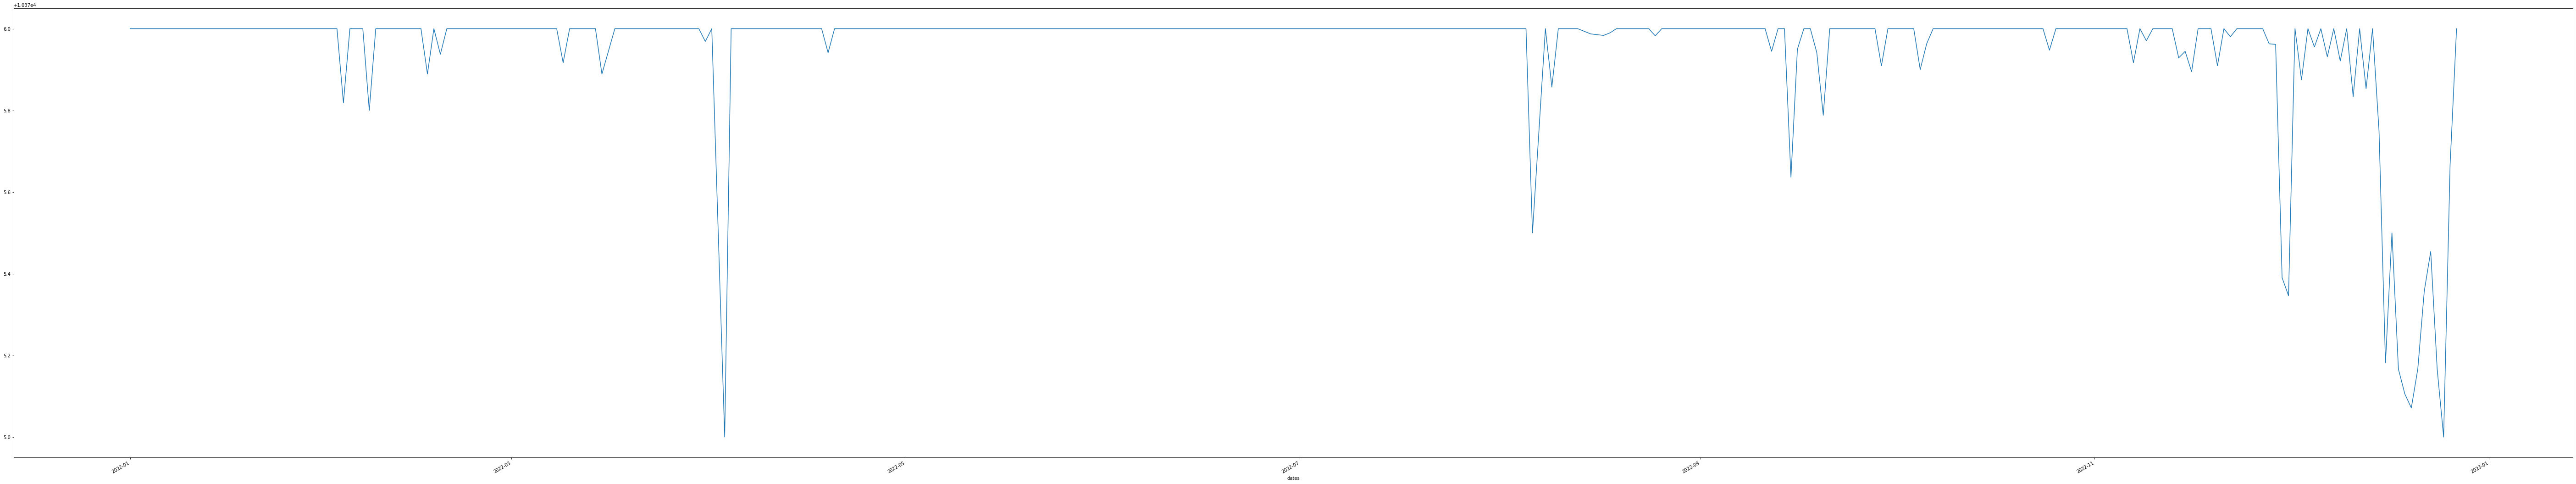

In [35]:
(df[:'2021'].groupby(['dates'])['watchers'].mean()).plot()

In [42]:
df.tail()

,times,datetime,watchers,sentiment,text,time_bin
dates,,,,,,
2013-08-07,09:08:59Z,2013-08-07 05:08:59-04:00,10376,N/A,"$GEO Earnings out BMO, EPS estimate 0.44","[5, 6)"
2013-07-31,17:16:13Z,2013-07-31 13:16:13-04:00,10376,N/A,NEW POST: Youâ€™re Not Going to Get Out of Pri...,"[13, 14)"
2013-07-26,18:31:07Z,2013-07-26 14:31:07-04:00,10376,N/A,$GEO The GEO Group Announces Date for Second Q...,"[14, 15)"
2013-07-16,21:01:19Z,2013-07-16 17:01:19-04:00,10376,N/A,Geo Group Inc (The) just filed its Registratio...,"[17, 18)"
2013-07-01,15:44:18Z,2013-07-01 11:44:18-04:00,10376,N/A,"As mentioned over weekend, sold $GEO $JOE, pro...","[11, 12)"


In [43]:
res[-1]

{'msg_id': 14388018,
 'symbol': {'id': 5489,
  'symbol': 'GEO',
  'symbol_mic': 'GEO.XNYS',
  'title': 'Geo Group, Inc.',
  'aliases': [],
  'is_following': False,
  'watchlist_count': 10376,
  'has_pricing': True},
 'ticker_title': 'Geo Group, Inc.',
 'body': 'As mentioned over weekend, sold $GEO $JOE, proceeds to cash currently.',
 'created_date': '2013-07-01',
 'created_time': '15:44:18Z',
 'user': {'id': 209828,
  'username': 'MPortfolios',
  'name': 'Funding Secured',
  'avatar_url': 'https://avatars.stocktwits.com/production/209828/thumb-1392341647.png',
  'avatar_url_ssl': 'https://avatars.stocktwits.com/production/209828/thumb-1392341647.png',
  'join_date': '2013-01-25',
  'official': True,
  'identity': 'Official',
  'classification': ['suggested', 'official'],
  'search_regions': [],
  'followers': 8098,
  'following': 65,
  'ideas': 4181,
  'watchlist_stocks_count': 23,
  'like_count': 415,
  'plus_tier': '',
  'premium_room': '',
  'trade_app': False,
  'trade_status': 'PE

In [40]:
counter = 0
for text, sentiment in zip(get_text(res), get_sentiment(res)):
    print(sentiment, "\t",text,"\n")
    print('-'*50)
    counter+=1
    if counter> 5: break

N/A 	 $GEO one of Michael Burry&#39;s private prison picks 

--------------------------------------------------
Bullish 	 $GEO look at these numbers in the context of Q3 vs Q4. We have a massive Q4 on our hands for GEO. This is for the ATD border program only.
https://trac.syr.edu/immigration/detentionstats/atd_pop_table.html 

--------------------------------------------------
N/A 	 $GEO looks like it’s at 10.72 but ticker showing 11.18 

--------------------------------------------------
Bullish 	 $GEO 

This will take off any minute…!!!
Just low volume 

--------------------------------------------------
N/A 	 Short sale volume (not short interest) for $GEO on 2022-12-23 is 58%. http://shortvolumes.com/?t=GEO via @shortvolumes 

--------------------------------------------------
Bullish 	 $GEO I am NOT a TA guy. In fact, I have limited knowledge of and a general feeling of malaise regarding it…..but I must admit, this link intrigues me when comparing it to GEO’s activity.
https://ww

# Text Classification

In [ ]:
df.groupby(['sentiment']).count()

In [ ]:
import re
import string
import joblib
import datetime as dt
import html
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
# Preprocess & Cleaning
# Function to remove Stopwords
def remove_stopwords(row):
    stopword_list = stopwords.words('english')
    words = []
    for word in row:
        if word not in stopword_list:
            words.append(word)
    return words

# Function to remove emojis
def remove_emoji(tweets):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweets)

# Preprocessing Function
def tweets_preprocessing(df):
    
    raw_df = df.copy()
    
    # Removing all tickers from comments
    raw_df['text'] = raw_df['text'].str.replace(r'([$][a-zA-z]{1,5})', '')

    # Make all sentences small letters
    raw_df['text'] = raw_df['text'].str.lower()

    # Converting HTML to UTF-8
    raw_df["text"] = raw_df["text"].apply(html.unescape)

    # Removing hastags, mentions, pagebreaks, handles
    # Keeping the words behind hashtags as they may provide useful information about the comments e.g. #Bullish #Lambo
    raw_df["text"] = raw_df["text"].str.replace(r'(@[^\s]+|[#]|[$])', ' ')  # Replace '@', '$' and '#...'
    raw_df["text"] = raw_df["text"].str.replace(r'(\n|\r)', ' ')  # Replace page breaks

    # Removing https, www., any links etc
    raw_df["text"] = raw_df["text"].str.replace(r'((https:|http:)[^\s]+|(www\.)[^\s]+)', ' ')

    # Removing all numbers
    raw_df["text"] = raw_df["text"].str.replace(r'[\d]', '')

    # Remove emoji
    raw_df["text"] = raw_df["text"].apply(lambda row: remove_emoji(row))

    # Tokenization
    raw_df['text'] = raw_df['text'].apply(word_tokenize)

    # Remove Stopwords
    raw_df['text'] = raw_df['text'].apply(remove_stopwords)

    # Remove Punctuation
    raw_df['text'] = raw_df['text'].apply(lambda row: [word for word in row if word not in string.punctuation])

    # Combining back to full sentences
    raw_df['text'] = raw_df['text'].apply(lambda row: ' '.join(row))

    # Remove special punctuation not in string.punctuation
    raw_df['text'] = raw_df['text'].str.replace(r"\“|\”|\‘|\’|\.\.\.|\/\/|\.\.|\.|\"|\'", '')

    # Remove all empty rows
    processed_df = raw_df[raw_df['text'].str.contains(r'^\s*$') == False]

    return processed_df

bear = df.sentiment == 'Bearish'
bull = df.sentiment == 'Bullish'
neutral = df.sentiment == 'N/A'

In [ ]:
processed_df = tweets_preprocessing(df)

In [ ]:
#processed_df[bull].text.head(8)

In [ ]:
#processed_df[bear].head(10)

# Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV ML model K-fold training - Multinomial Naive Bayes
def train_model_naive_bayes(training_data):
   
    # Creating a train test set for labelled comments to train the model using a Moltuinomial NB classifier
    x_train, x_test, y_train, y_test = train_test_split(training_data['text'], training_data['sentiment'], 
                                                        test_size=0.2, stratify=training_data['sentiment'])

    # Create pipeline
    pipeline = Pipeline([
        ('bow', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])
    

    # This is where we define the values for GridSearchCV to iterate over
    parameters = {
                  'classifier__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
    }

    # Do 10-fold cross validation for each of the 6 possible combinations of the above params
    grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
    grid.fit(x_train, y_train)
    
    return grid, x_test, y_test

# GridSearchCV ML model K-fold training - Logistic Regression
def train_model_logistic_regression(training_data):
   
    # Creating a train test set for 500k labelled comments to train the model using a Moltuinomial NB classifier
    x_train, x_test, y_train, y_test = train_test_split(training_data['text'], training_data['sentiment'], 
                                                        test_size=0.2, stratify=training_data['sentiment'])

    # create pipeline
    pipeline = Pipeline([
        ('bow', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', LogisticRegression())  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

    # this is where we define the values for GridSearchCV to iterate over
    parameters = {
                  'classifier__C': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
    }
    # do 10-fold cross validation for each of the 6 possible combinations of the above params
    grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
    grid.fit(x_train, y_train)
    
    return grid, x_test, y_test


In [ ]:
# Results & Classification Report
# GridSearch Results
def display_best_result(grid):
    
    print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
    print('\n')
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    params = grid.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


# Classification report for test set
def display_classification_report(df, grid, y_test, x_test):
   
    print('Test Set Classification Report')
    y_preds = grid.predict(x_test)
    print('accuracy score: ', accuracy_score(y_test, y_preds))
    print('\n')
    print('confusion matrix: \n', confusion_matrix(y_test, y_preds))
    print('\n')
    print(classification_report(y_test, y_preds))

    # Classification report for remaining data
    print('Remaining Data Set Classification Report')
    y_data = df["text"]
    y_preds = grid.predict(y_data)
    print('accuracy score: ', accuracy_score(df["sentiment"], y_preds))
    print('\n')
    print('confusion matrix: \n', confusion_matrix(df["sentiment"], y_preds))
    print('\n')
    print(classification_report(df["sentiment"], y_preds))

In [ ]:
def run_model(model):
    if model == "NB":
        grid, x_test, y_test = train_model_naive_bayes(training_data)
        display_best_result(grid)
        display_classification_report(df, grid, y_test, x_test)
        return grid
    elif model == "LR":
        grid, x_test, y_test = train_model_logistic_regression(training_data)
        display_best_result(grid)
        display_classification_report(df, grid, y_test, x_test)
        return grid
    else:
        print('Input either:\n1. "NB" - Naive Bayes\n2. "LR" - Logistic Regression')

In [ ]:
processed_df.head()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Run
if __name__ == '__main__':
    data = processed_df[['sentiment','text']].copy()
    data = data[data["sentiment"].isin(["Bullish", "Bearish"])]  # Filter down into labelled comments

    # Under-sampling 30k of bullish, 30k of bearish to fix imbalance dataset
    bullish_df = data[data["sentiment"] == "Bullish"].sample(50000)
    bearish_df = data[data["sentiment"] == "Bearish"].sample(50000)
    training_data = pd.concat([bullish_df, bearish_df]).sample(frac=1)

    run_model("NB")

In [ ]:
data = processed_df[['sentiment','text']].copy()
data = data[data["sentiment"].isin(["Bullish", "Bearish"])]  # Filter down into labelled comments
x_train, y_train = data['text'], data['sentiment']

pipeline = Pipeline([
        ('bow', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', LogisticRegression())  # train on TF-IDF vectors w/ xyz classifier
    ])

    # this is where we define the values for GridSearchCV to iterate over
parameters = {
              'classifier__C': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
}
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(x_train, y_train)


In [ ]:
grid.predict(X = processed_df[processed_df["sentiment"].isin(["N/A"])][['text']].values[90])

In [ ]:
neutrals = processed_df[processed_df["sentiment"].isin(["N/A"])][['text']].values

In [ ]:
classifications = []
classifications_proba = []

for text in neutrals:
    classifications.append(grid.predict(X = text))
    classifications_proba.append(grid.predict_proba(X = text))

In [ ]:
for text, clss in zip(neutrals, classifications):
    print(text, '\t', clss)
    print('-'*50)